#importing all required library

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, LSTM
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
#import visualkeras

# Importing the cifar-10 dataset from Keras 

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
print('x_train Shape: {}'.format(X_train.shape))
print('x_test Shape: {}'.format(X_test.shape))
print('y_train Shape: {}'.format(Y_train.shape))
print('y_test Shape: {}'.format(Y_test.shape))

x_train Shape: (50000, 32, 32, 3)
x_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000, 1)
y_test Shape: (10000, 1)


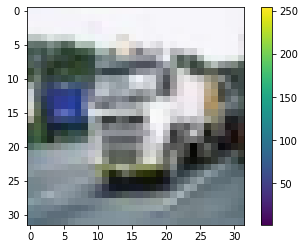

In [ ]:
plt.figure()
plt.imshow(X_train[1000])
plt.colorbar()

In [ ]:
X_train = X_train/255
X_test = X_test/255

# One-Hot-Encoding
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)

In [ ]:
Y_train_en

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Visualization of Dataset

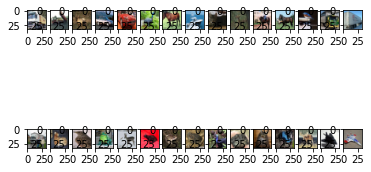

In [ ]:
for i in range(1,31):
  plt.subplot(2, 15, i)
  plt.imshow(X_train[i])

# Base Model

In [ ]:
model = Sequential()
model.add(Conv2D(1024,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(512,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4)) 
model.add(Conv2D(256,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(units =10  , activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [ ]:
model.summary()
history = model.fit(X_train, Y_train_en, epochs = 10, verbose=1,validation_data=(X_test,Y_test_en))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 29, 29, 1024)      50176     
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 512)       8389120   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 512)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 512)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 256)       2097408   
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 128)         524416    
                                                      

#Architecture of Model

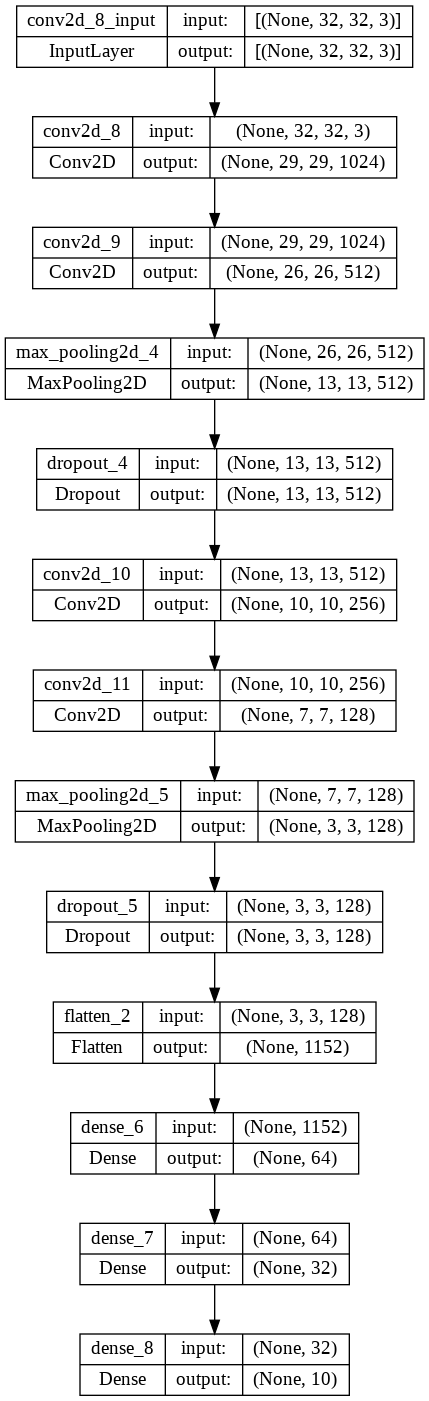

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
evaluation = model.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_1(with Dropouts): {}'.format(evaluation[1]))

313/313 [==============================] - 15s 47ms/step - loss: 0.9340 - accuracy: 0.6702
Test Accuracy of Model_1(with Dropouts): 0.670199990272522


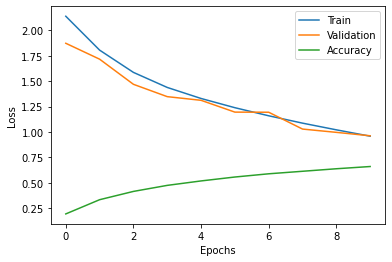

In [ ]:
def plotloss(history_1):
    plt.plot(history_1.history['loss'])
    plt.plot(history_1.history['val_loss'])
    plt.plot(history_1.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(history)

#Data Preprocessing for RNN

In [ ]:
img = np.float32(X_train[0])
k1=(img[:,:,0]+img[:,:,1]+img[:,:,2])/3;
k1

array([[0.24052288, 0.1751634 , 0.18431373, ..., 0.52026147, 0.49542484,
        0.4901961 ],
       [0.07320262, 0.        , 0.03398693, ..., 0.34771243, 0.32941177,
        0.34771243],
       [0.09150327, 0.03006536, 0.10980392, ..., 0.32941177, 0.33202615,
        0.29281047],
       ...,
       [0.61960787, 0.5071896 , 0.50326794, ..., 0.47450984, 0.12287582,
        0.13986929],
       [0.5424836 , 0.44183007, 0.47058824, ..., 0.5568628 , 0.2522876 ,
        0.22222222],
       [0.57124186, 0.51111114, 0.53333336, ..., 0.7058824 , 0.4614379 ,
        0.3751634 ]], dtype=float32)

In [ ]:
img_float32

array([[[0.8980392 , 0.8980392 , 0.9372549 ],
        [0.9254902 , 0.92941177, 0.96862745],
        [0.91764706, 0.9254902 , 0.96862745],
        ...,
        [0.8509804 , 0.85882354, 0.9137255 ],
        [0.8666667 , 0.8745098 , 0.91764706],
        [0.87058824, 0.8745098 , 0.9137255 ]],

       [[0.87058824, 0.8666667 , 0.8980392 ],
        [0.9372549 , 0.9372549 , 0.9764706 ],
        [0.9137255 , 0.91764706, 0.9647059 ],
        ...,
        [0.8745098 , 0.8745098 , 0.9254902 ],
        [0.8901961 , 0.89411765, 0.93333334],
        [0.8235294 , 0.827451  , 0.8627451 ]],

       [[0.8352941 , 0.80784315, 0.827451  ],
        [0.91764706, 0.9098039 , 0.9372549 ],
        [0.90588236, 0.9137255 , 0.95686275],
        ...,
        [0.8627451 , 0.8627451 , 0.9098039 ],
        [0.8627451 , 0.85882354, 0.9098039 ],
        [0.7921569 , 0.79607844, 0.84313726]],

       ...,

       [[0.5882353 , 0.56078434, 0.5294118 ],
        [0.54901963, 0.5294118 , 0.49803922],
        [0.5176471 , 0

In [ ]:
X_train_grayscale = np.zeros(X_train.shape[:-1])
X_test_grayscale = np.zeros(X_test.shape[:-1])
for i in range(X_train.shape[0]): 
    img = np.float32(X_train[0])
    k1=(img[:,:,0]+img[:,:,1]+img[:,:,2])/3;
    X_train_grayscale[i] = k1
for i in range(X_test.shape[0]): 
    img = np.float32(X_train[0])
    k1=(img[:,:,0]+img[:,:,1]+img[:,:,2])/3;
    X_test_grayscale[i] = k1    

#Creation of RNN Model

In [ ]:
model1 = keras.Sequential()
model1.add(Input(shape=(32,32)),)
model1.add(layers.GRU(1024))
model1.add(layers.Dense(10))
model1.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

#Architecture of Model

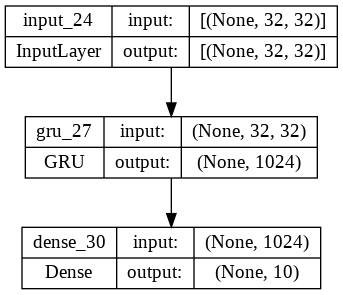

In [ ]:
plot_model(model1, to_file='rnn_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
np.shape(X_train_grayscale)
np.shape(Y_train_en)

(50000, 10)

In [ ]:
model1.summary()
history1= model1.fit(np.array(X_train_grayscale), np.array(Y_train_en), epochs = 10, verbose=1)

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_27 (GRU)                (None, 1024)              3250176   
                                                                 
 dense_30 (Dense)            (None, 10)                10250     
                                                                 
Total params: 3,260,426
Trainable params: 3,260,426
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 11.2826 - accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 11.2827 - accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 11.2826 - accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 11.2826 - accuracy: 0.1000
Epoch 5/10
1563/156

# Loss and Accuracy

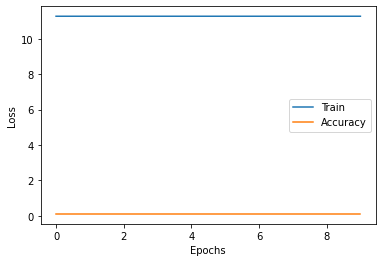

In [ ]:
def plotloss(history_1):
    plt.plot(history_1.history['loss'])
    plt.plot(history_1.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Accuracy'])
    plt.show()    
plotloss(history1)